# Project
## Link to Github repository
https://github.com/szm2004/final-project

## Introduction
In online multiplayer environments such as Minecraft, players contribute varying amounts of data through their activity on the server. Understanding which kinds of players are most likely to contribute a large amount of data can help game administrators prioritize engagement strategies, optimize server resources, and target high-value users.

**Can we predict which players are most likely to contribute a large amount of data based on their characteristics?**

We define "high-contribution players" as those who spend at least 600 seconds (10 minutes) in total game time. We use two datasets:
- `players.csv`: demographic and subscription data
- `sessions.csv`: individual gameplay session logs


### Background
This analysis is part of a research initiative conducted by UBC Computer Science. The department is collecting large-scale player data from a Minecraft server. The focus here is to identify what kinds of players are more likely to generate large amounts of data.

## Methods & Results

In [1]:
library(tidyverse)
library(ggplot2)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

### Load the data from CSV files

Begin by importing both datasets using `read_csv`. These files contain player demographic information and session logs.

In [3]:
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")
head(players, 10)
head(sessions, 10)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


A new column `session_length` is created by subtracting the start time from the end time. Sessions with missing values are filtered out.

In [2]:
sessions <- sessions |>
  mutate(session_length = original_end_time - original_start_time) |>
  filter(!is.na(session_length))

ERROR: Error in eval(expr, envir, enclos): object 'sessions' not found


Group the session data by player and compute the sum of session lengths to get total playtime.

In [10]:
player_sessions <- sessions |>
  group_by(hashedEmail) |>
  summarise(total_seconds = sum(session_length, na.rm = TRUE))

Merge session summaries into the player dataset. Players with at least 600 seconds of gameplay are labeled as "high contributors."

In [31]:
merged <- players |>
  left_join(player_sessions, by = "hashedEmail") |>
  mutate(
    total_seconds = ifelse(is.na(total_seconds), 0, total_seconds),
    is_high_contributor = total_seconds >= 600
  )

### Visualization

Visualize the distribution of high-contribution status across different experience levels using a stacked bar chart.

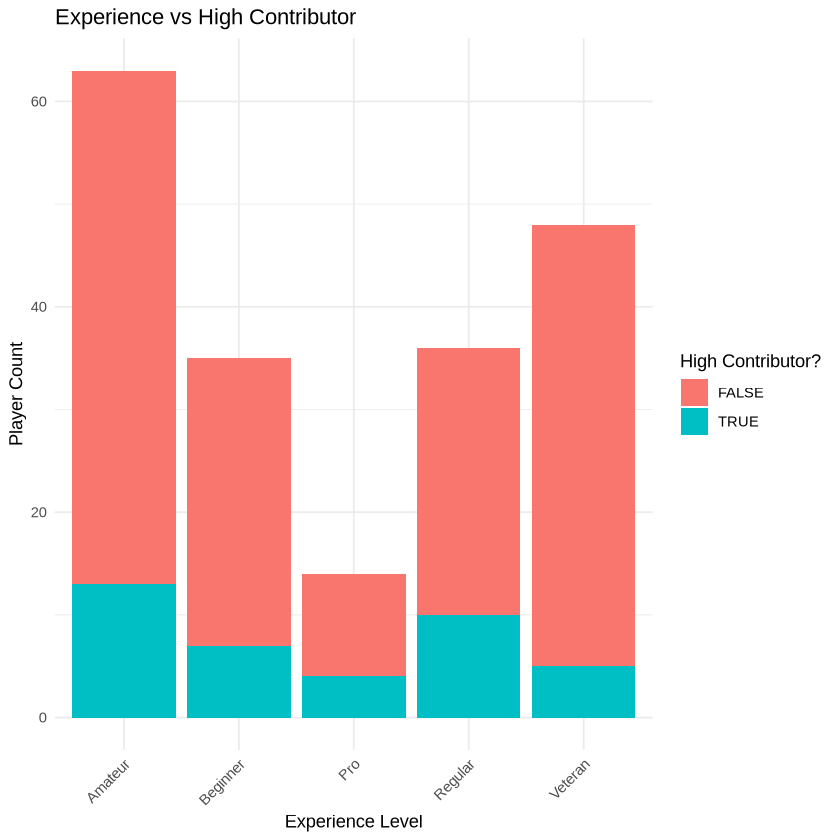

In [19]:
merged |>
  count(experience, is_high_contributor) |>
  ggplot(aes(x = experience, y = n, fill = is_high_contributor)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Experience vs High Contributor",
       x = "Experience Level", y = "Player Count", fill = "High Contributor?") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Select relevant variables for the model. Remove rows with missing age data and convert necessary columns to factors.

In [20]:
model_data <- merged |>
  select(is_high_contributor, experience, gender, Age, subscribe, played_hours) |>
  filter(!is.na(Age)) |>
  mutate(
    is_high_contributor = as.factor(is_high_contributor),
    experience = as.factor(experience),
    gender = as.factor(gender),
    subscribe = as.factor(subscribe)
  )

70% of the data is used for training and the remaining 30% for testing. The `sample()` function is used for a simple random split.

In [28]:
set.seed(123)
n <- nrow(model_data)
train_indices <- sample(1:n, size = floor(0.7 * n))
train_data <- model_data[train_indices, ]
test_data <- model_data[-train_indices, ]

Fit a logistic regression model to predict whether a player is a high contributor based on selected features.

In [29]:
model <- glm(is_high_contributor ~ ., data = train_data, family = "binomial")
summary(model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = is_high_contributor ~ ., family = "binomial", data = train_data)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -16.7042  6522.6397  -0.003 0.997957    
experienceBeginner         1.5710     1.4268   1.101 0.270870    
experiencePro              1.0901     1.5250   0.715 0.474716    
experienceRegular          1.9979     1.4150   1.412 0.157954    
experienceVeteran         -3.1728     2.8635  -1.108 0.267855    
genderFemale               8.1248  6522.6396   0.001 0.999006    
genderMale                11.1629  6522.6393   0.002 0.998634    
genderNon-binary          10.4818  6522.6393   0.002 0.998718    
genderPrefer not to say   11.7421  6522.6393   0.002 0.998564    
genderTwo-Spirited        -3.9247  7197.4420  -0.001 0.999565    
Age                        0.0353     0.1089   0.324 0.745679    
subscribeTRUE              0.6048     1.2227   0.495 0.620830    
played_hours               3.8144     0.9

### Results

Use the test data to evaluate the model. Predictions are converted to class labels and compared against actual outcomes.

In [30]:
predicted <- predict(model, newdata = test_data, type = "response")
predicted_class <- ifelse(predicted > 0.5, "TRUE", "FALSE")
confusionMatrix(factor(predicted_class, levels = c("FALSE", "TRUE")),
                test_data$is_high_contributor)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE    41    3
     TRUE      3   12
                                          
               Accuracy : 0.8983          
                 95% CI : (0.7917, 0.9618)
    No Information Rate : 0.7458          
    P-Value [Acc > NIR] : 0.003088        
                                          
                  Kappa : 0.7318          
                                          
 Mcnemar's Test P-Value : 1.000000        
                                          
            Sensitivity : 0.9318          
            Specificity : 0.8000          
         Pos Pred Value : 0.9318          
         Neg Pred Value : 0.8000          
             Prevalence : 0.7458          
         Detection Rate : 0.6949          
   Detection Prevalence : 0.7458          
      Balanced Accuracy : 0.8659          
                                          
       'Positive' Class : FALSE           
                     

## Discussion

The analysis shows that players with more experience are more likely to be high contributors. Logistic regression using basic demographic features provides some predictive power for identifying these players.
Further improvements could involve tuning thresholds, testing other models, or incorporating more features like number of sessions or time of day.